# Задача 1

Реализовать решето Эратосфена

In [ ]:
def sieve_of_eratosthenes(n: int) -> list[int]:
    numbers = [True] * (n + 1)
    numbers[0], numbers[1] = False, False

    for i in range(2, int(n**0.5) + 1):
        if numbers[i]:
            for j in range(i*i, n + 1, i):
                numbers[j] = False

    return [i for i, is_prime in enumerate(numbers) if is_prime]

In [ ]:
def prepare_answer(primes: list[int]) -> str:
  return ', '.join(map(str, primes))

In [ ]:
if __name__ == "__main__":
  n = 100
  prime_numbers = sieve_of_eratosthenes(n)
  print(f"Простые числа до {n}:\n {prepare_answer(prime_numbers)}")

Простые числа до 100:
 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97


# Задача 2

Определить координату пересечения диагоналей четырехугольника


Шаги:

0) Проверить корректность вершин и валидность четырехугольника
1) Определить уравнения прямых (диагоналей)
2) Определить точку пересечения прямых

In [ ]:
class Point:
  def __init__(self, x: float, y: float):
    self.x = x
    self.y = y

In [ ]:
class Line:
  def __init__(self, point_1: Point, point_2: Point):
    self.is_vertical = point_1.x == point_2.x
    if self.is_vertical:
      self.x = point_1.x
    else:
      self.k = (point_1.y - point_2.y) / (point_1.x - point_2.x)
      self.b = point_1.y - self.k * point_1.x

  def is_point_on_line(self, point: Point, eps: float = 10**-5) -> bool:
    if self.is_vertical and abs(point.x - self.x) < eps:
      return True
    elif abs(point.y - (self.k * point.x + self.b)) < eps:
      return True
    else:
      return False

  def get_intersection_coordinate(self, line_2) -> Point:
    assert not self.is_vertical or not line_2.is_vertical, "lines haven't the one intersection point"

    if self.is_vertical:
      x = self.x
      y = line_2.k * x + line_2.b
    elif line_2.is_vertical:
      x = line_2.x
      y = self.k * x + self.b
    else:
      x = (line_2.b - self.b) / (self.k - line_2.k)
      y = self.k * x + self.b

    intersection_point = Point(x=x, y=y)
    return intersection_point

In [ ]:
class Quadrilateral:
  def __init__(self, vertices: list[Point]):
    assert len(vertices) == 4, "List of vertices must contain 4 point"

    self.vert_1 = vertices[0]
    self.vert_2 = vertices[1]
    self.vert_3 = vertices[2]
    self.vert_4 = vertices[3]

    self.diagonal_1 = Line(vertices[0], vertices[2])
    self.diagonal_2 = Line(vertices[1], vertices[3])

    assert not self.diagonal_1.is_point_on_line(self.vert_2), "it's not a quadrilateral"
    assert not self.diagonal_1.is_point_on_line(self.vert_4), "it's not a quadrilateral"
    assert not self.diagonal_2.is_point_on_line(self.vert_1), "it's not a quadrilateral"
    assert not self.diagonal_2.is_point_on_line(self.vert_3), "it's not a quadrilateral"


In [ ]:
if __name__ == "__main__":
  vertices = [(3, 5), (4, -2), (0, -4), (-2, 3)]
  # vertices = [(3, 6), (4, 5), (5, 4), (7, 6)] # it's a triangle
  vertices = [Point(x=cords[0], y=cords[1]) for cords in vertices]

  quadrilateral = Quadrilateral(vertices)
  intersection_point = quadrilateral.diagonal_1.get_intersection_coordinate(quadrilateral.diagonal_2)
  print(f"x = {intersection_point.x}; y = {intersection_point.y}")


x = 1.3913043478260871; y = 0.17391304347826164


# Задача 3

Задача про максимальный объем воды в сосуде с тонкими стенками (при решении подразумевается, что высота стенок неотрицательна)

Решение: дп + максимумы на префиксах/суффиксах


In [ ]:
def get_prefix_max(height: list[float]) -> list[float]:
  prefix = [0]
  for i in height:
    prefix.append(max(prefix[-1], i))
  return prefix

In [ ]:
def get_suffix_max(height: list[float]) -> list[float]:
  suffix = [0]
  for i in range(len(height)-1, -1, -1):
    suffix.append(max(suffix[-1], height[i]))
  return suffix[::-1]

In [ ]:
if __name__ == "__main__":
  walls = [6, 8, 4, 10, 9, 5, 8]
  prefix, suffix = get_prefix_max(walls), get_suffix_max(walls)

  counter = 0
  for i in range(len(walls)):
    counter += min(prefix[i+1], suffix[i+1])

  print(counter)

47


# Задача 4

Расовая сегрегация Шеллинга

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
import random
import time

In [ ]:
def get_random_coordinates(coordinates: dict[set[int]]) -> tuple[int, int]:
  y = random.choice(list(coordinates.keys()))
  x = random.choice(list(coordinates[y]))

  coordinates[y].remove(x)
  if len(coordinates[y]) == 0:
    del coordinates[y]

  return x, y

In [ ]:
def setup_positions(field: list[list[int]], n: int, cell_types: tuple[str, int, int]) -> None:
  coordinates = dict()
  for i in range(n):
    coordinates[i] = set(range(n))

  for i in range(n*n//100):
    for _, race_index, race_percent in cell_types:
      for i in range(race_percent):
        cords = get_random_coordinates(coordinates)
        field[cords[1]][cords[0]] = race_index



In [ ]:
def calculate_neighbors(field: list[list[int]], row: int, column: int, cell_val: int, n: int) -> int:
  neighbors_counter = 0
  for i in range(max(row-1, 0), min(row+2, n)):
    for j in range(max(column-1, 0), min(column+2, n)):
      if i == row and j == column:
        continue
      try:
        if field[i][j] == cell_val:
          neighbors_counter += 1
      except:
        pass
  return neighbors_counter

In [ ]:
def get_emty_and_unhappy_cells(field: list[list[int]], n: int, m: int) -> tuple[list[tuple[int, int]], list[tuple[int, int]]]:
  empty_cords = []
  unhappy_cords = []

  for row in range(n):
    for column in range(n):
      cell_val = field[row][column]

      if cell_val == 0:
        empty_cords.append((column, row))
        continue

      neighbors_counter = calculate_neighbors(field, row, column, cell_val, n)
      if neighbors_counter < m:
        unhappy_cords.append((column, row))

  return empty_cords, unhappy_cords

In [ ]:
def draw_field(field: list[list[int]], cell_types: tuple[str, int, int]) -> None:
  cmap = ListedColormap([cell_type[0] for cell_type in cell_types])
  data = np.array(field)

  plt.figure(figsize=(4.5, 4.5))
  plt.imshow(data, cmap=cmap, origin='upper')

  plt.show()


In [ ]:
def relocate_random_people(field: list[list[int]], empty_cords: list[tuple[int]], unhappy_cords: list[tuple[int]], m: int, n: int) -> None:
  if len(unhappy_cords) == 0:
    return
  random_index_empty = random.randint(0, len(empty_cords)-1)
  random_index_unhappy = random.randint(0, len(unhappy_cords)-1)

  empty_cell = empty_cords.pop(random_index_empty)
  unhappy_cell = unhappy_cords.pop(random_index_unhappy)
  unhappy_value = field[unhappy_cell[1]][unhappy_cell[0]]

  field[unhappy_cell[1]][unhappy_cell[0]] = 0
  field[empty_cell[1]][empty_cell[0]] = unhappy_value
  empty_cell, unhappy_cell = unhappy_cell, empty_cell
  empty_cords.append(empty_cell)

  if calculate_neighbors(field, row=unhappy_cell[1], column=unhappy_cell[0], cell_val=unhappy_value, n=n) < m:
    unhappy_cords.append(unhappy_cell)

  for i in range(max(unhappy_cell[1]-1, 0), min(unhappy_cell[1]+2, n)):
    for j in range(max(unhappy_cell[0]-1, 0), min(unhappy_cell[0]+2, n)):
      if calculate_neighbors(field, i, j, field[i][j], n) >= m:
        for z in range(len(unhappy_cords)):
          if unhappy_cords[z] == (j, i):
            del unhappy_cords[z]
            break


  for i in range(max(empty_cell[1]-1, 0), min(empty_cell[1]+2, n)):
    for j in range(max(empty_cell[0]-1, 0), min(empty_cell[0]+2, n)):
      if field[i][j] == 0:
        continue
      if calculate_neighbors(field, i, j, field[i][j], n) < m and (j, i) not in unhappy_cords:
        unhappy_cords.append((j, i))


In [ ]:
def do_iteration(field: list[list[int]], empty_cords: list[list[int]], unhappy_cords: list[list[int]], m: int, n: int) -> None:
  relocate_random_people(field, empty_cords, unhappy_cords, m, n)

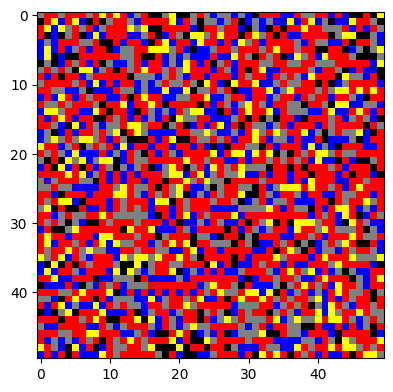

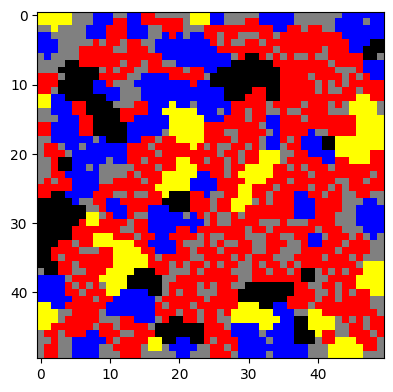

In [ ]:
if __name__ == "__main__":
  M = 3
  field_size = 5
  K = 50000

  cell_types = ( #  Здесь можно прописать свои значения, главное реальные цвета (или их HEX), 3я колонка int и в сумме должна давать 100, а для gray больше ноля (должны существовать пустые клетки), вторая колонка от 0 и по порядку
      ("gray", 0, 20),
      ("red", 1, 40),
      ("blue", 2, 20),
      ("yellow", 3, 10),
      ("black", 4, 10)
  )

  assert cell_types[0][1] == 0 and cell_types[0][2] > 0
  assert sum([race[2] for race in cell_types]) == 100, "Sum of percents must be 100"
  assert 1 <= field_size <= 50, "Incorrect field size"
  assert 1 <= M <= 8, "Incorrect M (neighborhood)"
  assert 1 <= K <= 1000000, "Incorrect K (iteration count)"


  N = 10 * field_size  # ATTENTION: constant for pretty calculation
  field = [[0 for i in range(N)] for j in range(N)]

  setup_positions(field, N, cell_types)
  empty_cords, unhappy_cords = get_emty_and_unhappy_cells(field, N, M)

  draw_field(field, cell_types)
  print("\n"*3)
  for i in range(K):
    do_iteration(field, empty_cords, unhappy_cords, M, N)
  draw_field(field, cell_types)